# ChatGPT

[ChatGPT](https://openai.com/blog/chatgpt) is one of several sophisticated AI models built by [OpenAI](https://openai.com/), a San Francisco-based company whose mission is to "ensure that artificial general intelligence benefits all of humanity." ChatGPT is a Large Language Model (LLM) built on GPT-3.5, which boasts 175 billion parameters and ranks as the largest neural network ever built. ChatGPT can generate human-like prose by responding to instructions written in the [Chat Markup Language](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/chatgpt), or ChatML for short. Here are few examples demonstrating how to leverage ChatGPT using its REST API.

![](Images/chatgpt.jpg)

Before running this notebook, create an environment variable named `API_KEY` and set it equal to your OpenAI API key. If you don't already have an OpenAI account and an API key to go with it, go to https://platform.openai.com/signup and create an account. Then go to the API Keys page, generate an API key, and save it where you can easily retrieve it later. OpenAI grants you a certain amount of free usage each month, so you don't have to create a paid account in order to get an API key. Once generated, an OpenAI API key can't be retrieved by returning to the OpenAI Web site. Be sure to save it in a secure place so you can retrieve it when needed. If you lose an API key, your only recourse is to generate a new one.

In [1]:
import os, openai

openai.api_key = os.environ['API_KEY']

Ask ChatGPT to write a paragraph of text describing molecular biology in the style of Dr. Seuss. Run this cell several times and you'll get a different result each time. Set `temperature` to 0.0, however, and the results will be the same most of the time:

In [2]:
messages = [{
    'role': 'user',
    'content': 'Describe molecular biology in the style of Dr. Seuss'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

In a world of cells so small and neat,
Molecular biology is the ultimate feat!
It's the study of molecules so tiny and bright,
And how they work to make life so right.

In every cell, a dance occurs,
As proteins and RNA twist and turn.
They make enzymes, they make machines,
And carry out life's biological schemes.

DNA, the master plan,
Controls it all with a stern hand.
It guides the building blocks of life,
And helps cells grow and end strife.

In molecular biology, we explore,
The secrets of cells to the core.
We learn how they work and how they thrive,
And discover new ways to keep life alive.

So let's take a look inside,
At molecules so small they often hide.
Through molecular biology, we'll uncover,
The secrets of life, forever and ever!


You can richen the UI experience by streaming the response. Here's how:

In [3]:
messages = [{
    'role': 'user',
    'content': 'Describe molecular biology in the style of Dr. Seuss'
}]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

Oh, let me tell you 'bout a thing called molecular biology,
It's all about the molecules, and how they like to party!

There's DNA and RNA, they're really quite a team,
They hold the information to create life's most fantastic schemes.

A-T and C-G, those are their little letters,
They spell out all the secrets that make life so much better.

Proteins are the party animals, they like to boogie down,
They come in all shapes and sizes, and they never wear a frown.

Their job is to make things happen, to keep the cell alive,
They're like the workers in a factory, always ready to thrive.

There's enzymes, receptors, transporters too,
All working together to make sure the cell pulls through.

And let's not forget about the membrane, that's a real star,
It's like the cell's protective shield, always up to par.

So that's the basics of molecular biology,
It's really quite fantastic, as you can plainly see.

Now go out there and explore this wondrous world of science,
Because with molecular bi

Messages transmitted to ChatGPT use the Chat Markup Language. ChatML exists so that ChatGPT can be given instructions and so that context can be preserved across calls. To demonstrate, ask ChatGPT what it's name is:

In [4]:
messages = [{
    'role': 'user',
    'content': 'My name is Jeff. What\'s your name?' \
}]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

As an AI language model, I don't have a name, but you can call me OpenAI. How can I assist you today?


But now try this:

In [5]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

Hi Jeff! My name is Sam. How can I assist you today?


You can be as specific as you’d like with `system` messages, even saying "If you don’t know the answer to a question, say I don’t know." You can also prescribe a persona. Replace "friendly" with "sarcastic" in the message from system and run the code again. The response may be "Oh, hi Jeff, I’m Sam. You can call me whatever you'd like, but don’t call me late for dinner." Run the code several times and there’s no end to the colorful responses you’ll receive.

ChatML's greatest power lies in persisting context from one call to the next. As an example, try this:

In [6]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

Hello Jeff, my name is Sam. I'm here to assist you today.


Then follow up immediately with this:

In [7]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'What is my name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

I'm sorry, but I do not have access to your name. May I know what you would like to be called?


ChatGPT will respond with something along the lines of "I'm sorry, but I don’t have access to that information." But now try this:

In [8]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    },
    {
        'role': 'assistant',
        'content': 'Hello Jeff, my name is Sam. Nice to meet you!'
    },
    {
        'role': 'user',
        'content': 'What is my name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

Your name is Jeff, as you mentioned earlier. Is there anything else you would like to know, Jeff?


Get it? Calls to ChatGPT are stateless. If you give ChatGPT your name in one call and ask it to repeat your name in the next call, ChatGPT has no clue. But with ChatML, you can provide past ChatGPT responses as context for the current call. You could easily build a conversational bot simply by repeating the last few prompts and responses in each call to ChatGPT. The further back you go, the longer the chatbot’s "memory" will be.

## Tokenization

ChatGPT doesn't work with words; it works with *tokens*. Tokenization plays an important role in Natural Language Processing. Neural networks can’t process text, at least not directly; they only process numbers. Tokenization converts words into numbers that a deep-learning model can understand. When ChatGPT generates a response by predicting a series of tokens, the tokenization process is reversed to convert the tokens into human-readable text.

ChatGPT uses a form of tokenization called [Byte-Pair Encoding](https://en.wikipedia.org/wiki/Byte_pair_encoding) (BPE), which was developed in the 1990s as a mechanism for compressing text. Today, it is widely used in the NLP space. Here’s how ChatGPT BPE-tokenizes the phrase "fourscore and seven years ago:"

![](Images/bpe.png)

As a rule of thumb, 3 words on average translate to about 4 BPE tokens. That’s important because ChatGPT limits the number of tokens in each API call. The maximum token count is controlled by a parameter named `max_tokens`. For ChatGPT, the default is 2,048 tokens or about 1,500 words, and the upper limit is 4,096. (GPT-4 expands the maximum token count to 32,768.) This limit applies to the combined length of the input and output in each API call. If the number of tokens exceeds `max_tokens`, then either the call will fail or the response will be truncated.

You can compute the number of tokens generated from a text sample with help from a Python package named [`tiktoken`](https://pypi.org/project/tiktoken/0.3.0/):

In [9]:
import tiktoken
 
text = 'Jeff loves to build and fly model jets. He built his first ' \
       'jet, a BVM BobCat, in 2007. After that, he built a BVM Bandit, ' \
       'a Skymaster F-16, and a Skymaster F-5. The latter two are 1/6th' \
       'scale models of actual fighter jets. Top speed is around 200 MPH.'
 
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')
num_tokens = len(encoding.encode(text))
print(f'{num_tokens} tokens')

78 tokens


You can estimate the token count for an entire `messages` array with the following code, which was adapted comments and all from the [ChatGPT documentation](https://platform.openai.com/docs/guides/chat/introduction):

In [10]:
num_tokens = 0
 
for message in messages:
    num_tokens += 4 # every message follows <im_start>{role/name}\n{content}<im_end>\n
    for key, value in message.items():
        num_tokens += len(encoding.encode(value))
        if key == 'name':  # if there's a name, the role is omitted
            num_tokens += -1 # role is always required and always 1 token
             
num_tokens += 2 # every reply is primed with <im_start>assistant
print(f'{num_tokens} tokens')

58 tokens


There are a couple of reasons to be aware of the token count in each call. First, you’re charged by the token for input and output. The price at the time of this writing was 0.2 cents per 1,000 tokens, which equates to 500,000 tokens – or roughly 375,000 words – per U.S. dollar. The larger the `messages` array and the longer the response, the more you pay. Second, when using the messages array to provide context from previous calls, you have a finite amount of space to work with. It's common practice to pick a number – say, 5 or 10 – and limit the context from previous calls to that number of messages, or to programmatically compute the number of tokens that a conversation comprises and include as many messages as `max_tokens` will allow while leaving room for the response.

## Working with text

ChatGPT can perform many NLP tasks such as sentiment analysis and neural machine translation (NMT) without further training. Here's an example that translates text from English to French. It's a good idea to set `temperature` to 0 here since you generally want translations to be accurate and repeatable rather than creative:

In [11]:
content =  f'Translate the following text from English to French: {text}'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0
)

print(response.choices[0].message.content)

Jeff adore construire et piloter des jets modèles réduits. Il a construit son premier jet, un BVM BobCat, en 2007. Après cela, il a construit un BVM Bandit, un Skymaster F-16 et un Skymaster F-5. Ces deux derniers sont des modèles à l'échelle 1/6 de véritables avions de chasse. La vitesse maximale est d'environ 200 MPH.


ChatGPT understands dozens of languages. It even knows Klingon. Let's see how the same paragraph translates to Klingon:

In [12]:
content = f'Translate the following text from English to Klingon: {text}'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0
)

print(response.choices[0].message.content)

Jeff vIghro' 'ej vIghoS model jets. vIghro' BVM BobCat, 2007. DaH jImej, vIghoS BVM Bandit, Skymaster F-16, 'ej Skymaster F-5. cha'logh cha'logh 1/6th scale fighter jets. yIbuS 200 MPH.


One of the practical uses for ChatGPT is editing existing text to make it more compelling. Here's an example that generates a marketing blurb for a webinar on AI:

In [13]:
content = 'Make the following marketing text more engaging: ' \
          'Learn how AI works and how it\'s used in business'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Discover the fascinating world of AI and uncover its powerful impact on the world of business! Peek behind the curtain to see how this innovative technology operates and how it's transforming industries as we know them. Gain a fresh perspective and equip yourself with the knowledge to stay ahead of the game in today's fast-paced world. Let's dive in and discover the limitless possibilities of AI together!


The following examples demonstrate how to use ChatGPT for sentiment analysis:

In [14]:
content = 'Indicate whether the following review\'s sentiment is positive or ' \
          'negative: Great food and excellent service'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Positive


In [15]:
content = 'Indicate whether the following review\'s sentiment is positive or ' \
          'negative: Long lines and poor customer service'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Negative


Sentiment analysis is a text-classification task. ChatGPT can classify text in other ways, too. The next two examples demonstrate how it could be used as the basis for a spam filter:

In [16]:
content = 'Indicate whether the following email is spam or not spam: ' \
          'Please plan to attend the code review at 2:00 p.m. this afternoon'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Not spam.


In [17]:
content = 'Indicate whether the following email is spam or not spam: ' \
          'Order prescription meds online and save $$$'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

spam


ChatGPT was trained on a massive body of data that includes [Common Crawl](https://commoncrawl.org/), a pair of book databases known as Books1 and Books2, [WebText2](https://www.eleuther.ai/projects/owt2/), and [Wikipedia](https://www.wikipedia.org/), so it's knowledge is vast. It can generally answer questions as long as the answers are somewhere on the Internet. Its answers aren't always correct because (surprise!) there's a lot of misinformation on the Internet. Here's a question that's pertinent to this notebook:

In [18]:
content = 'In which academic paper was the deep learning transformer ' \
          'introduced, and where can I find it?'

messages = [{ 'role': 'user', 'content': content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

The deep learning transformer was introduced in the academic paper "Attention Is All You Need" by Vaswani et al. The paper was published in the Proceedings of the 31st Conference on Neural Information Processing Systems (NIPS 2017). The paper can be accessed online from the official NIPS website or from the arXiv preprint server.


ChatGPT can also answer questions from context that you provide. Here's an example that involves my hobby. Observe that ChatGPT seems to have the ability to count:

In [19]:
question = 'How many jets has Jeff built?'

content = f'Answer the following question using the provided context, and if the ' \
          f'answer is not contained within the context, say "I don\'t know."\n\n' \
          f'Context: {text}\n\n' \
          f'Q: {question}\n\n' \
          f'A: '

messages = [{ 'role': 'user', 'content': content }]
    
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Jeff has built four jets.


ChatGPT is frequently used to ingest call transcripts and answer questions for scoping documents related to those transcripts. Here's an example that:

## Working with code

In addition to being trained on massive volumes of text comprising approximately 500 billion words, ChatGPT was trained with billions of lines of code. It can generate code, comment code, find bugs in code, and more, and it supports dozens of programming languages. Let's use a few examples to see what it's capable of. Start by using ChatGPT to implement a bubble sort in Python:

In [20]:
content = 'Create a Python function that accepts an array of numbers as ' \
          'input, bubble sorts the numbers, and returns a sorted array'

messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

Here's a Python function that accepts an array of numbers as input, bubble sorts the numbers, and returns a sorted array:

```python
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr
```

To use this function, simply call it with an array of numbers as an argument:

```python
arr = [4, 2, 7, 1, 3]
sorted_arr = bubble_sort(arr)
print(sorted_arr) # [1, 2, 3, 4, 7]
```

The function works by iterating through the entire array multiple times, comparing adjacent elements and swapping them if they are out of order. The iteration stops when no more swaps are needed, indicating that the array is fully sorted.

Now ask ChatGPT to explain the code that it just generated:

In [21]:
content = 'Explain what the following code does:\n' \
          'def bubble_sort(arr):\n' \
          '    n = len(arr)\n' \
          '    for i in range(n):\n' \
          '        for j in range(0, n-i-1):\n' \
          '            if arr[j] > arr[j+1]:\n' \
          '                arr[j], arr[j+1] = arr[j+1], arr[j]\n' \
          '    return arr'

messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

The code implements the bubble sort algorithm to sort an array of numbers in ascending order. The function takes an array 'arr' as input and calculates its length 'n'. It then iterates 'n' number of times, swapping adjacent elements in the array if they are in the wrong order. After each iteration, the largest unsorted element is moved to the end of the array. The sorted array is returned as output.

Use ChatGPT to convert a Python function to FORTRAN:

In [22]:
content = 'Convert the following Python function into a FORTRAN function:\n' \
          'def bubble_sort(arr):\n' \
          '    n = len(arr)\n' \
          '    for i in range(n):\n' \
          '        for j in range(0, n-i-1):\n' \
          '            if arr[j] > arr[j+1]:\n' \
          '                arr[j], arr[j+1] = arr[j+1], arr[j]\n' \
          '    return arr'


messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

subroutine bubble_sort(arr, n)
    integer n
    real arr(n)
    do i = 1, n
        do j = 1, n-i
            if (arr(j) > arr(j+1)) then
                temp = arr(j)
                arr(j) = arr(j+1)
                arr(j+1) = temp
            end if
        end do
    end do
end subroutine

Use ChatGPT to add comments to a block of code:

In [23]:
content = 'Add inline comments to the following code:\n' \
          'def bubble_sort(arr):\n' \
          '    n = len(arr)\n' \
          '    for i in range(n):\n' \
          '        for j in range(0, n-i-1):\n' \
          '            if arr[j] > arr[j+1]:\n' \
          '                arr[j], arr[j+1] = arr[j+1], arr[j]\n' \
          '    return arr'


messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

# Define bubble sort function
def bubble_sort(arr):
    # Get length of array
    n = len(arr)
    # Loop through array to compare elements
    for i in range(n):
        # Inner loop for comparing adjacent elements
        for j in range(0, n-i-1):
            # Swap if element at j is greater than element at (j+1)
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    # Return the sorted array
    return arr

Suppose you wanted to write a tool to add comments to uncommented source-code files. The next example loads **app.py**, adds comments to it, and saves the results in **app-commented.py**:

In [24]:
with open('Data/app.py', 'r') as input_file:
    lines = input_file.read()
    content = 'Add inline comments to the following code:\n' + lines

    messages = [{ 'role': 'user', 'content' : content }]

    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages
    )

    with open('Data/app-commented.py', 'w') as output_file:
        output_file.write(response.choices[0].message.content)
        print('Done!')

Done!


It works with C# source code as well:

In [25]:
with open('Data/Program.cs', 'r') as input_file:
    lines = input_file.read()
    content = 'Add inline comments to the following code:\n' + lines

    messages = [{ 'role': 'user', 'content' : content }]

    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages
    )

    with open('Data/Program-commented.cs', 'w') as output_file:
        output_file.write(response.choices[0].message.content)
        print('Done!')

Done!


Speaking of C#: Can ChatGPT rewrite a block of C# code that manually iterates over a `List` to use LINQ?

In [26]:
content = 'Rewrite the following C# code to use LINQ:\n' \
          'var picks = new List<DailyStock>();\n' \
          'foreach (var stock in stocks)\n' \
          '{\n' \
          '    if (stock.Close > stock.Open)\n' \
          '    {\n' \
          '        picks.Add(stock);\n' \
          '    }\n' \
          '}\n' \
          'foreach(var pick in picks)\n' \
          '{\n' \
          '    Console.WriteLine($"{pick.Symbol}: {pick.Open:c} -> {pick.Close:c}");\n' \
          '}\n'

messages = [{ 'role': 'user', 'content' : content }]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

var picks = stocks.Where(stock => stock.Close > stock.Open).ToList();
picks.ForEach(pick => Console.WriteLine($"{pick.Symbol}: {pick.Open:c} -> {pick.Close:c}"));


Use ChatGPT to generate a non-trivial SQL query:

In [27]:
content = 'Generate a SQL query to list the names of all departments ' \
          'that have employed 10 or more people in the last 3 months. ' \
          'The query targets a table with the following schema:\n' \
          'Employee(id, name, department_id)\n' \
          'Department(id, name, address)\n' \
          'Salary_Payments(id, employee_id, amount, date)\n'

messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

SELECT d.name as department_name
FROM Department d
JOIN Employee e ON d.id = e.department_id
JOIN Salary_Payments sp ON e.id = sp.employee_id
WHERE sp.date >= DATEADD(month, -3, GETDATE())
GROUP BY d.name
HAVING COUNT(DISTINCT e.id) >= 10;

ChatGPT is cognizant of popular programming libraries and frameworks, too. Here, it relies on one of them to generate a function that performs sentiment analysis:

In [28]:
content = 'Generate a Python function that accepts a string as input and ' \
          'analyzes the string for sentiment. The function returns a value ' \
          'from 0.0 to 1.0, where 0.0 means the sentiment is very negative ' \
          'and 1.0 means it is very positive.'

messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

As an AI language model, I can provide you with the following code snippet that uses the TextBlob library to analyze the sentiment of a given string:

```
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    normalized_sentiment = (sentiment + 1) / 2
    return normalized_sentiment
```

The `analyze_sentiment` function takes a string as input and creates a `TextBlob` object from it. The `sentiment` property of the `TextBlob` object returns a value between -1.0 and 1.0, where negative values indicate negative sentiment and positive values indicate positive sentiment. 

To convert this value to a scale of 0.0 to 1.0, we add 1 to the sentiment value and divide by 2. This maps the sentiment value from the range of -1.0 to 1.0 to the range of 0.0 to 1.0.

You can call this function with any string and it will return a sentiment score between 0.0 and 1.0.

One of the more remarkable aspects of ChatGPT is its ability to find bugs in code. Just after my book went to the printer in 2022, I discovered a bug in the latest version of Scikit-learn that prevented some of my samples from working properly. I spent a couple of hours in the source code and found the bug. I filed a [bug report](https://github.com/scikit-learn/scikit-learn/issues/24942) and the Scikit team confirmed the bug and promised to fix it in the next version. I had to scramble to rewrite some of the code samples in my book to work around the bug and get the changes to the printer before the presses started rolling. Let's see if ChatGPT can find the bug:

In [29]:
with open('Data/lfw.py', 'r') as input_file:
    lines = input_file.read()
    content = 'Find the bug that prevents the _load_imgs function from properly ' \
              'cropping images as specified by the slice_ parameter:\n' + lines

    messages = [{ 'role': 'user', 'content' : content }]
    
chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

The bug is that the crop operation on the PIL Image object does not modify it in place. Therefore, the cropped image needs to be assigned back to pil_img before resizing it.

Below is the fixed code:

```
def _load_imgs(file_paths, slice_, color, resize):
    """Internally used to load images"""
    try:
        from PIL import Image
    except ImportError:
        raise ImportError(
            "The Python Imaging Library (PIL) is required to load data "
            "from jpeg files. Please refer to "
            "https://pillow.readthedocs.io/en/stable/installation.html "
            "for installing PIL."
        )

    # compute the portion of the images to load to respect the slice_ parameter
    # given by the caller
    default_slice = (slice(0, 250), slice(0, 250))
    if slice_ is None:
        slice_ = default_slice
    else:
        slice_ = tuple(s or ds for s, ds in zip(slice_, default_slice))

    h_slice, w_slice = slice_
    h = (h_slice.stop - h_slice.start) // (h_slice

Finally, let's see if ChatGPT can generate a Flask Web site that supports user interaction:

In [30]:
content = 'Generate a Flask Web site whose home page contains a text field ' \
          'in which the user types a comment. Include a button that, when ' \
          'clicked, analyzes the comment for sentiment and displays a score ' \
          'from 0.0 to 1.0 indicating how positive the comment is.'

messages = [{ 'role': 'user', 'content' : content }]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

As an AI language model, I cannot generate a Flask Web site. However, I can provide you with a sample code that you can use as a starting point to build your Flask Web site.

Here's the sample code:

```python
from flask import Flask, render_template, request
from textblob import TextBlob

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        comment = request.form['comment']
        sentiment_score = get_sentiment_score(comment)
        return render_template('result.html', score=sentiment_score)
    return render_template('home.html')

def get_sentiment_score(comment):
    blob = TextBlob(comment)
    return round(blob.sentiment.polarity, 2)

if __name__ == '__main__':
    app.run(debug=True)
```

In this code, we import the necessary modules, including Flask and TextBlob. We define a route for the home page ('/') that accepts both GET and POST requests. If the request method is POST, we get the comment from the form and 

Does the code work? If you're not sure, follow ChatGPT's instructions and see!

## Working with images

ChatGPT generates text, not images, but OpenAI's [DALL·E 2](https://openai.com/product/dall-e-2) model can generate images, create variations of existing images, edit images, and more. Here's an example. The following photo was taken in Iceland in 2022. It's a decent picture except for the chain fence in the background:

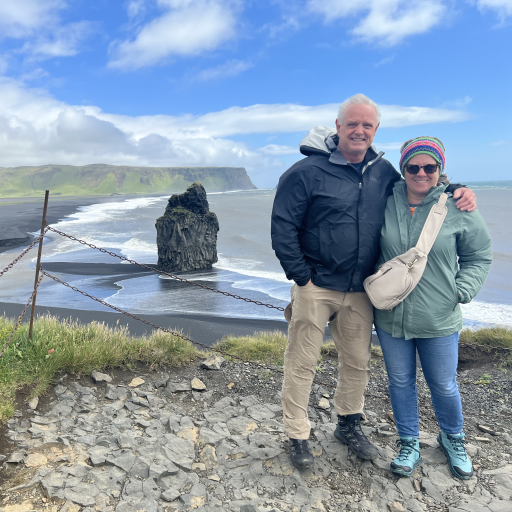

In [31]:
from PIL import Image

image = Image.open('Data/iceland.png')
display(image)

You can use a free paint tool to replace objects you want removed from the image with transparent pixels:

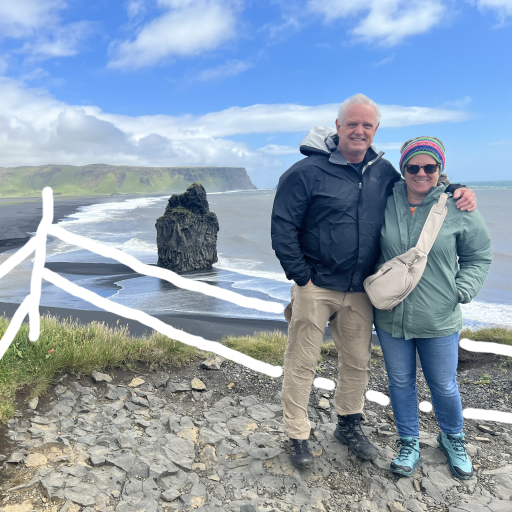

In [32]:
image = Image.open('Data/iceland-mask.png')
display(image)

Then you can use DALL·E 2's *inpainting* feature to fill in the missing pixels:

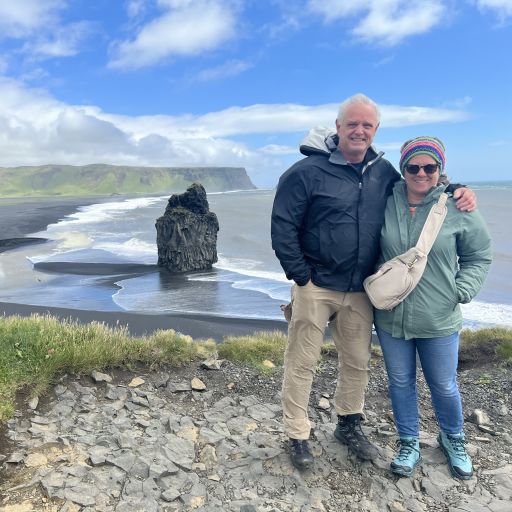

In [33]:
import base64
from io import BytesIO

response = openai.Image.create_edit(
    image=open('Data/iceland.png', 'rb'),
    mask=open('Data/iceland-mask.png', 'rb'),
    prompt='Two people on a cliff overlooking a beach',
    size='512x512',
    n=1,
    response_format='b64_json'
)

image_data = response['data'][0]['b64_json']
image = Image.open(BytesIO(base64.b64decode(image_data)))
display(image)

One of DALL·E 2's most remarkable talents is *outpainting*: extending an image to show how it might look on a larger canvas. Here is a rather famous painting:

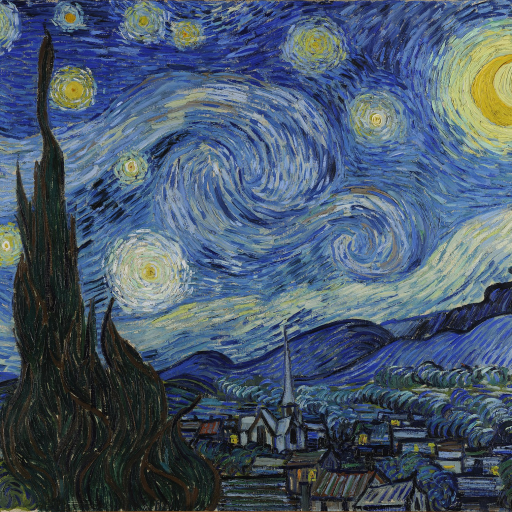

In [34]:
image = Image.open('Data/starry-night-512.png')
display(image)

Here's how DALL·E 2 imagines the painting might look had Van Gogh painted it on a larger canvas:

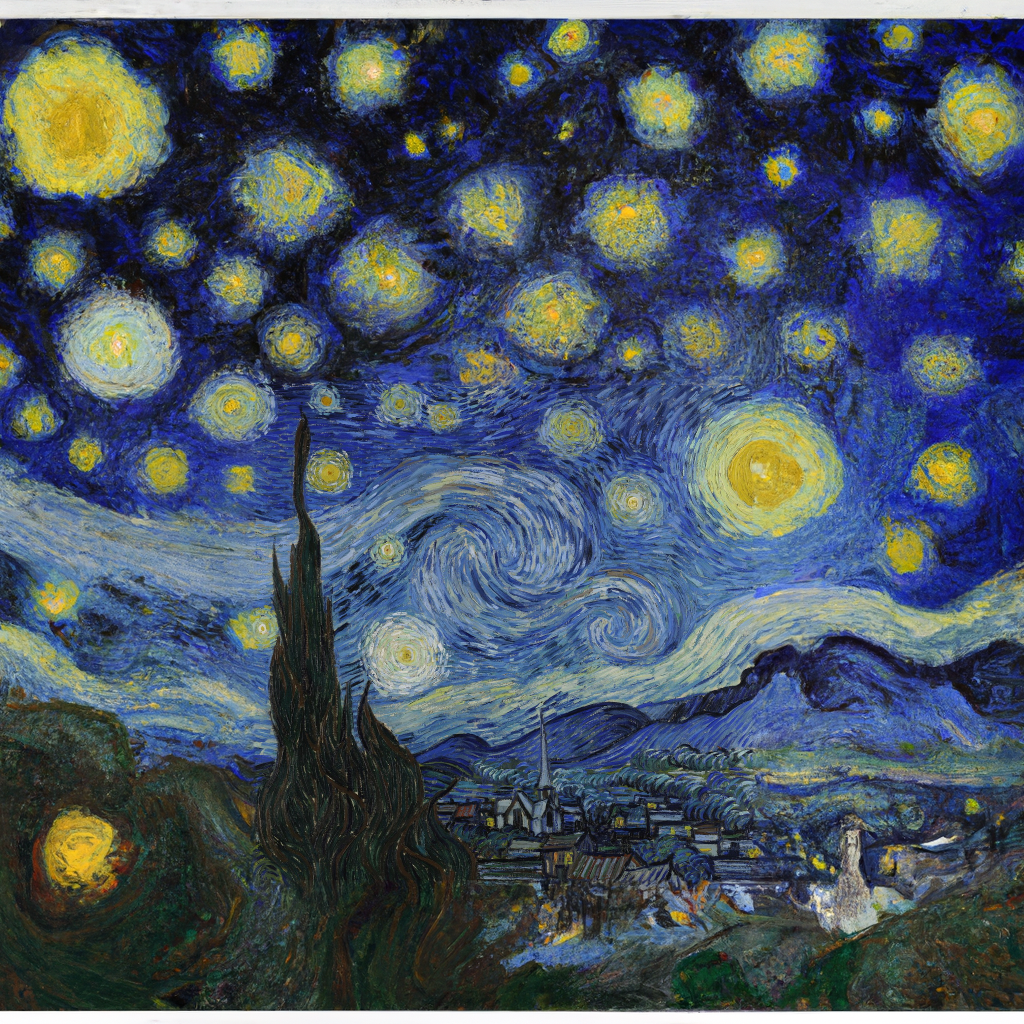

In [35]:
response = openai.Image.create_edit(
    image=open('Data/starry-night-mask-1024.png', 'rb'),
    mask=open('Data/starry-night-mask-1024.png', 'rb'),
    prompt='Painting of starry night in the style of van gogh',
    size='1024x1024',
    n=1,
    response_format='b64_json'
)

image_data = response['data'][0]['b64_json']
image = Image.open(BytesIO(base64.b64decode(image_data)))
display(image)

Now *that's* an imagination!